## 과일 이미지 분류

- 캐글 360-fruits에서 데이터 사용(https://www.kaggle.com/moltean/fruits)


- 사과, 파인애플, 바나나 이미지 분리
>100x100인 과일 이미지 종류별로 100장씩 들어있는 데이터


#### 1.사진의 픽셀값을 이용하여 분리(픽셀의 평균으로 구분)

#### 2. k-평균으로 구분

In [1]:
# 사용 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
root = 'D:/Portfolio/machine learning dataset'

fruits = np.load(root + '/fruits_300.npy')

In [3]:
# 100x100인 300장의 사진
fruits.shape

(300, 100, 100)

In [4]:
# 첫 번째 이미지의 첫 번째 행
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


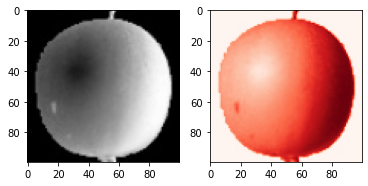

In [5]:
# 첫 번째 이미지 출력 
plt.subplot(1,2,1)
plt.imshow(fruits[0], cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(fruits[0], cmap = 'Reds')
plt.show()

첫 번째 이미지는 사과로 유추해 볼 수 있다. 픽셀값이 0에 가까울수록 검게 나타나고 높은 값일 수록 밝게 표시된다(왼쪽 사진 기준)

### 왜 밝게 나타내는가?
- 우리가 집중해야하는건 사과라는 이미지지 배경이 아니기때문(알고리즘 계산을 할 때 픽셀값이 0이면 출력도 0이므로 의미가 없다. 따라서 출력값이 높을수록 의미 부여도 올라간다.)

물론 배경이 어두우면 구분하기 어려울 수 있으니 배경을 반전 시킬수도 있다.

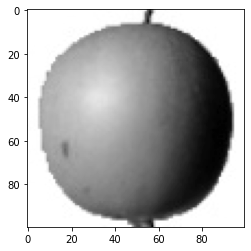

In [6]:
# 이미지 반전
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

0에 가까울수록 밝아지고, 255에 가까울수록 짙은 부분으로 변함.

이제 100장씩 과일 이미지가 분류되어있기에 다른 과일이미지도 불러와본다.

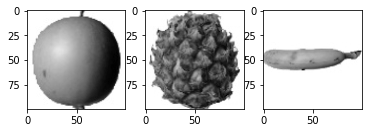

In [7]:
# 사과, 파인애플, 바나나 이미지
fig, ax = plt.subplots(1,3)
ax[0].imshow(fruits[0], cmap = 'gray_r')
ax[1].imshow(fruits[100], cmap = 'gray_r')
ax[2].imshow(fruits[200], cmap = 'gray_r')
plt.show()

각 과일의 이미지의 픽셀은 배열로 나타낸다. 
---------> 우리는 과일 이미지별 평균을 내서 차이를 확인할 수 있다.

이 때 100 x 100 이미지를 1차원 10000개의 배열로 변환해준다(이미지를 출력하긴 어렵지만 배열을 계산할 땐 편리하기 때문!)

In [8]:
# 과일 별 분리
apple = fruits[0:100].reshape(-1,100*100)
pine = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

In [9]:
print(apple.shape)
print(pine.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


변환한 배열은 (이미지100장, 해당 이미지 배열)이다. 우리는 평균 값의 차이를 비교해야하므로 평균을 계산 할 축을 지정해줘야한다.

axis = 0으로 지정할 경우 행 기준, axis = 1로 지정할 경우 열 기준으로 계산한다.

In [10]:
# 사과 샘플 픽셀별 평균값
print(apple.mean(axis = 0))

[1.01 1.01 1.01 ... 1.   1.   1.  ]


In [11]:
# 사과 샘플 100개의 픽셀 평균 값
print(apple.mean(axis = 1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


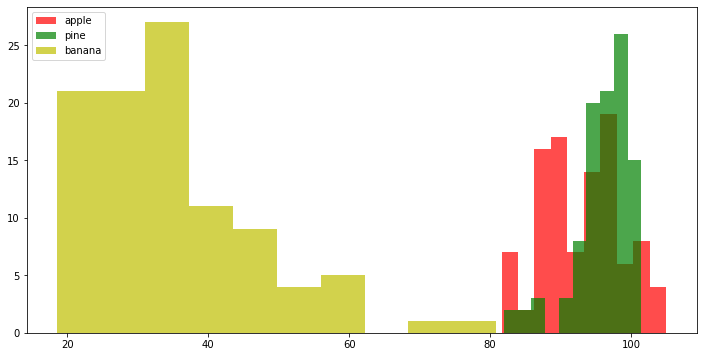

In [12]:
# 샘플 별로 분포를 살펴보면
plt.figure(figsize = (12,6))
plt.hist(np.mean(apple,axis = 1), alpha = 0.7 ,color = 'r')
plt.hist(np.mean(pine,axis = 1), alpha = 0.7, color = 'g')
plt.hist(np.mean(banana,axis = 1), alpha = 0.7,color = 'y')
plt.legend(['apple','pine','banana'])
plt.show()

바나나의 픽셀 평균값은 다른 과일들과 구분이 가지만 사과와 파인애플은 구분하기가 어렵다. 아마도 바나나는 길고 파인애플과 사과는 동그란 모양이 비슷해서 그런걸로 추측

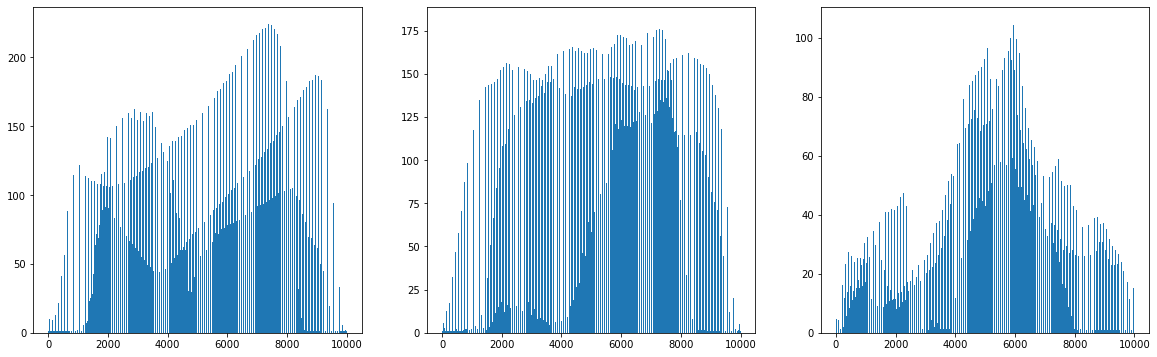

In [13]:
# 10000개의 픽셀 그래프
fig, ax= plt.subplots(1,3, figsize = (20,6))
ax[0].bar(range(10000),np.mean(apple,axis = 0))
ax[1].bar(range(10000),np.mean(pine,axis = 0))
ax[2].bar(range(10000),np.mean(banana,axis = 0))
plt.show()

픽셀별 평균을 살펴보면 사과는 이미지 아래쪽으로 갈수록 값이 높아지는 반면 파인애플은 이미지 전반적으로 고르게 나타난다.

바나나는 중앙 부분에서 유독 높은 픽셀값을 보여준다.

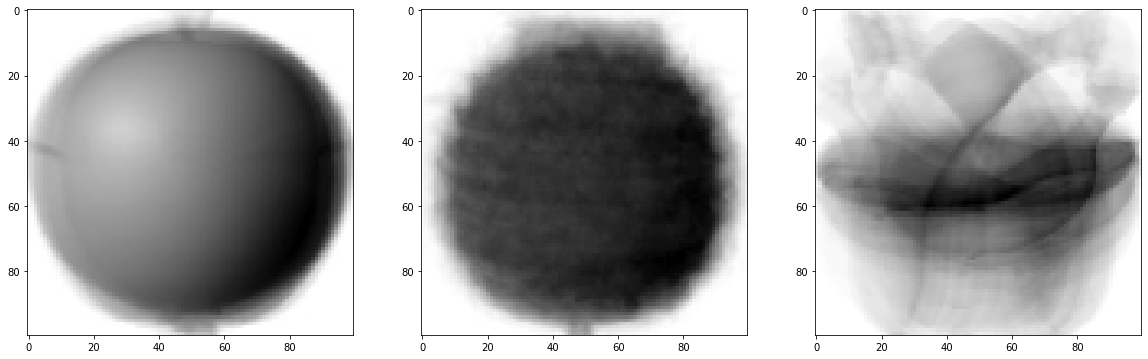

In [14]:
# 다시 이미지로 확인해보기
# 100x100
apple_mean = np.mean(apple, axis = 0).reshape(100,100)
pine_mean = np.mean(pine, axis = 0).reshape(100,100)
banana_mean = np.mean(banana,axis = 0).reshape(100,100)

# 이미지
fig, ax = plt.subplots(1,3, figsize = (20,6))
ax[0].imshow(apple_mean, cmap = 'gray_r')
ax[1].imshow(pine_mean, cmap = 'gray_r')
ax[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

### 1. 평균값과 가까운 이미지 분류

- 평균 - 절댓값 오차로 평균과 가까운 이미지 순으로 정렬한다.

In [15]:
# 먼저 과일별 픽셀값에서 사과 픽셀 평균을 - 이후 절댓값을 씌운다(이때 abs(-1)은 1을 반환 : 입력과 동일한 크기로 반환하기 위함!)
result = np.abs(fruits - apple_mean)
# 각 샘플별로 평균을 구하기 위해서 기존의 result는 (300,100,100)이므로 < 0을 제외한 1,2를 axis로 지정해줌
mean_result = np.mean(result, axis = (1,2))
print(mean_result)
print(mean_result.shape)

[17.37576  13.508874 17.183394 15.68311  17.983306 20.565392 16.795812
 16.144276 19.611994 21.32059  16.454222 16.590134 13.37039  17.23263
 15.92806  15.496638 18.582212 16.48196  27.651556 19.7871   20.826912
 16.417934 17.059946 15.904296 15.086176 19.371364 24.076362 14.777732
 19.20517  20.805182 14.797906 18.658418 15.973216 13.04259  18.381052
 16.59904  16.288504 18.960586 13.88574  16.497594 18.40376  19.174642
 29.096702 18.40849  28.223962 21.42994  19.740466 15.590532 13.082678
 18.765996 14.391198 21.464746 26.261028 15.887148 18.568706 16.410426
 17.108034 13.178824 18.199846 13.503056 20.845032 16.898184 22.81774
 18.99896  19.102706 16.636216 14.845644 19.357872 14.778086 14.468082
 13.085526 15.946606 20.42774  16.241996 13.720382 18.416166 15.229106
 16.411342 13.47148  20.050622 17.296816 21.071312 18.451708 19.645494
 15.585712 20.582004 13.850318 13.269222 21.875262 17.152098 15.60477
 23.890138 14.442124 18.794826 15.750524 16.58135  19.375552 17.802096
 15.47841

가장 작은 순서대로 100개 선택(계산값과의 오차가 가장 작은 100개의 샘플)

이때 argsort를 사용하여 작은 것에서 큰 순서대로 정렬한다.

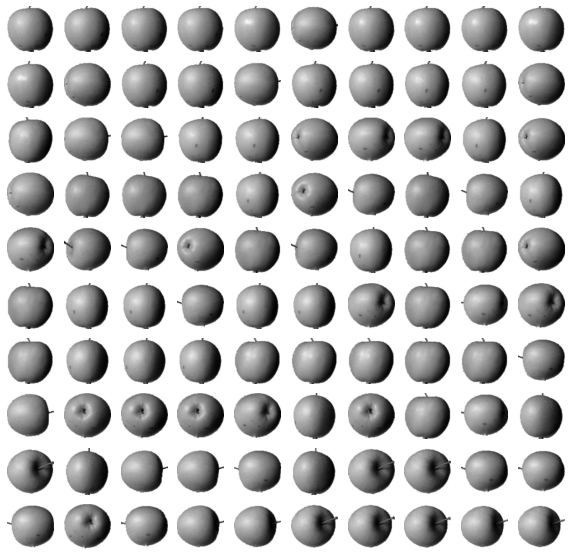

In [16]:
# 오차가 가장 작은 100개의 샘플
apple_idx = np.argsort(mean_result)[:100]

# 100개의 샘플 시각화
# 서브 그래프 생성
fig, ax = plt.subplots(10,10, figsize = (10,10))
# 10개의 행과 열 반복
for i in range(10) :
    # 행 생성
    for j in range(10) :
        # 샘플별 위치 설정 : 반복문이 처음 1열을 돌면 idx도 마찬가지로 0*10 + 1 = 1
        ax[i,j].imshow(fruits[apple_idx[i*10+j]], cmap = 'gray_r')
        # 축 삭제
        ax[i,j].axis('off')
plt.show()

픽셀의 평균값과 가장 근접한 사진 100개를 고른 결과 전부 사과를 출력했다!

## K-Means

앞선 파일은 사과와 바나나, 파인애플이 어떤 이미지인지 알고있었다.(그덕에 평균을 구했고 이미지별 차이를 구분해냈다)

**만약 내가 선택한 이미지가 무슨 이미지인지 모른다면 어떻게 평균값을 구해서 이미지를 분류할것인가....**<br>
 
이럴때 사용할 수 있는게 **K-Means 군집 알고리즘**이다.


**K-Means 작동 방식**
***
1. 무작위로 K개의 클러스터 중심을 정한다.

2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다.

3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.

4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.
***
    
    


In [17]:
# 다시 아까 데이터를 불러와서
fruits

array([[[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 

In [18]:
# 다시 이전 데이터를 불러오기
fruits = np.load(root + '/fruits_300.npy')

In [19]:
# k-means를 훈련시키기 위해 2차원 데이터로 변환
fruits_2d = fruits.reshape(-1,100*100)

kmeans는 초기 클러스터 개수를 지정해줘야 한다. 이때 n_clusters를 사용한다. 우리의 과일은 총 3개이므로 초기 클러스터 개수도 3개로 지정했다.

In [20]:
# kmeans 학습
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [21]:
# 군집 결과, 클러스터를 3개로 지정했기 때문에 label은 0,1,2 출력
print(km.labels_)
# label별 샘플 개수
print(np.unique(km.labels_, return_counts = True))

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2]), array([ 91,  98, 111], dtype=int64))


In [22]:
# label별 시각화 출력
# 3차원 배열을 입력, ratio에 따라 행과 열크기에 비례하여 커지게 함
def draw_fruits(arr, ratio = 1) :
    n = len(arr) # 샘플 개수
    
    # 그래프의 행, 한 줄에 10개씩 그림 그리기(샘플 개수를 10개로 나눠 전체 행 개수 계산)
    rows = int(np.ceil(n/10))
    
    # 그래프의 열, 행이 1개이면 열의 개수는 샘플 개수 아니면 그냥 10개
    cols = n if rows < 2 else 10
    # 만든 행과 열 기반으로 서프플롯, sqeeze = False로 놓을시 행 열 압축안함
    fig, ax = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
    
    for i in range(rows) :
        for j in range(cols) :
            # n개까지만 그리도록
            if i*10 + j < n :
                ax[i,j].imshow(arr[i*10 + j], cmap = 'gray_r')
            ax[i,j].axis('off')
    plt.show()

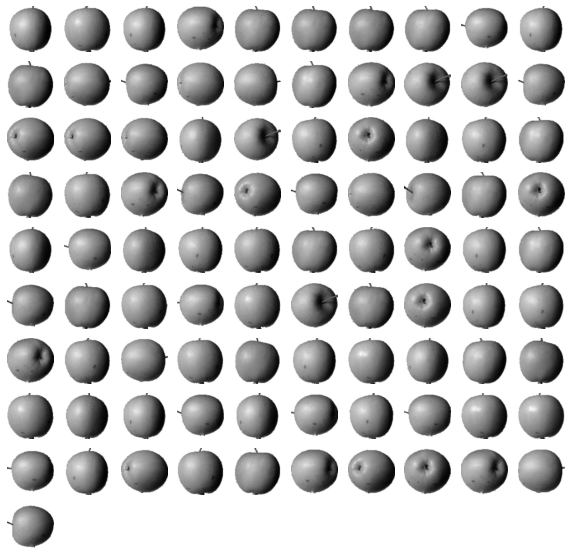

In [23]:
draw_fruits(fruits[km.labels_ == 0])

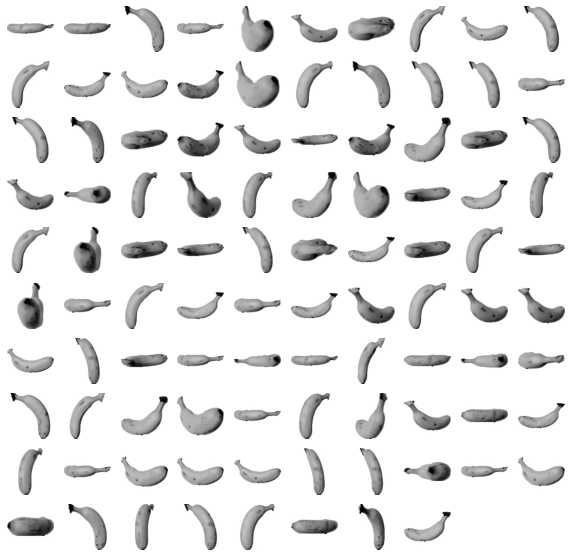

In [24]:
draw_fruits(fruits[km.labels_ == 1])

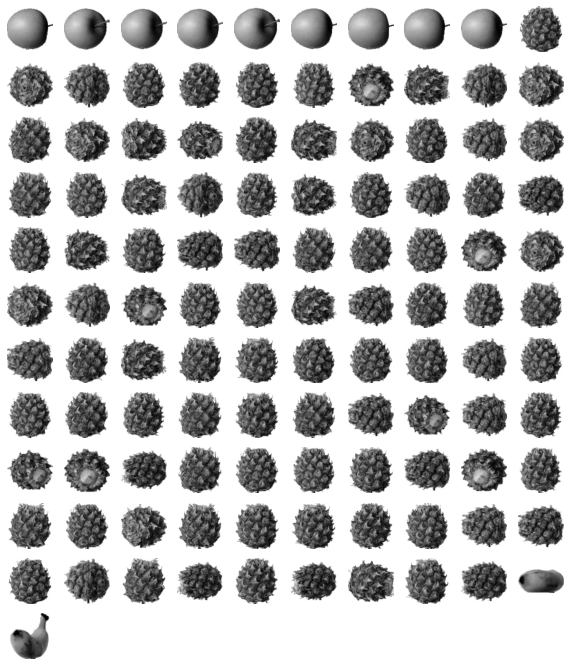

In [25]:
draw_fruits(fruits[km.labels_ == 2])

Kmeans 결과 사과와 바나나는 정확하게 분류했다. 다만, 파인애플 이미지에 사과와 바나나가 들어가있다. 그래도 나쁘진 않은 수준이라고 판단했다.

[[1.01098901 1.01098901 1.01098901 ... 1.         1.         1.        ]
 [1.10204082 1.07142857 1.10204082 ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


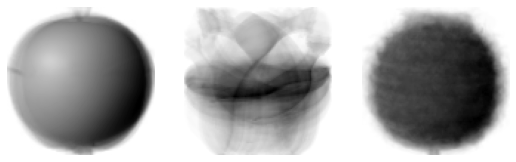

In [26]:
### kmeans 클러스터 중심
print(km.cluster_centers_)
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio = 3)

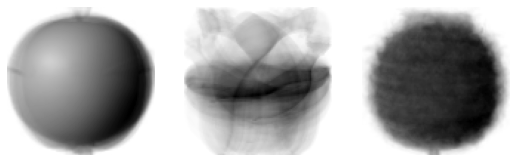

In [27]:
# 픽셀 평균값
fig, ax = plt.subplots(1,3, figsize = (9,9))
for i in range(0,3):
    if i == 0 :
        ax[0].imshow(apple_mean, cmap = 'gray_r')
    elif i == 1 :
        ax[1].imshow(banana_mean, cmap = 'gray_r')
    else :    
        ax[2].imshow(pine_mean, cmap = 'gray_r')
    ax[i].axis('off')
plt.show()

이전에 픽셀 평균값을 시각화한 결과와 매우 비슷했다.


Kmeans의 단점 중 하나는 클러스터 개수를 사전에 지정해야 한다는 것이다. 적절한 k를 찾기위해서는 대표적으로 **Elbow** 방법이 있다.

kmeans는 클러스터 중심과 샘플 사이의 거리를 잴 수 있는데 이 거리의 제곱 합을 **이너셔**라고 부른다. 이너셔는 클러스터에 속한 샘플이   얼마나 가깝게 모여있는지를 나타내는 값인데 클러스터 개수가 늘어나면 클러스터들의 샘플 크기는 줄어들기 때문에 이너셔도 줄어든다.<br> Elbow는
클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는다.

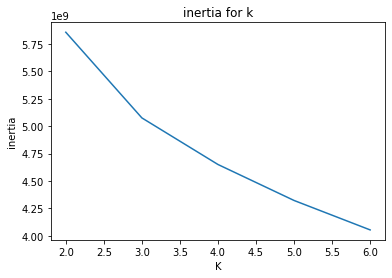

In [28]:
# inertia를 통한 elbow 찾기 
inertia = []
for k in range(2,7) :
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('K')
plt.ylabel('inertia')
plt.title('inertia for k')
plt.show()

클러스터 개수를 증가시키면서 이너셔를 그래프로 그린 결과, 감소하면서 꺾이는 지점이 존재한다.
> 이 지점부터는 클러스터 개수를 느려도 클러스터의 밀집 정도가 크게 개선되지 않는다, 즉 이너셔가 크게 줄어들지 않는다.<br>
> 이 지점을 **Elbow** 라고 부른다.

위 그래프에선 K = 3일 때, 이너셔가 꺾이는 지점으로 나타났다. 그러나 y축 수치상으로는 꺾이는 지점과 꺽인 이후 지점의 수치 감소치가 비슷하므로 최적지라고 보긴 어렵다.